In [3]:
import cv2
import os
import numpy as np
import mahotas as mt
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Loading image
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resizeing for consistency
            images.append(img)
            labels.append(label)
    
    return images, labels

# Loading both categories
with_mask_images, with_mask_labels = load_images_from_folder("../dataset/with_mask", 1)
without_mask_images, without_mask_labels = load_images_from_folder("../dataset/without_mask", 0)

# Combining datasets
X_images = with_mask_images + without_mask_images
y_labels = with_mask_labels + without_mask_labels


In [ ]:
def extract_hog_features(image):
    gray = rgb2gray(image)  # Converting to grayscale
    features, _ = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return features

In [6]:
def extract_lbp_features(image, radius=1, n_points=8):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)
    return hist


In [ ]:
def extract_canny_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)  # Applying Canny edge detection
    return edges.flatten()  # Flattening the edge image into a feature vector


In [ ]:
def extract_color_histogram(image, bins=32):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Converting to HSV
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    return hist.flatten()


In [ ]:
def extract_features(image):
    hog_feat = extract_hog_features(image)
    lbp_feat = extract_lbp_features(image)
    canny_feat = extract_canny_features(image)
    color_hist_feat = extract_color_histogram(image)

    # Concatenating all features into one feature vector
    feature_vector = np.hstack((hog_feat, lbp_feat, canny_feat, color_hist_feat))
    return feature_vector

# Extracting features from all images
X_features = np.array([extract_features(img) for img in X_images])
y = np.array(y_labels)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)

print("SVM Accuracy:", svm_acc)
print(classification_report(y_test, svm_preds))


SVM Accuracy: 0.9263803680981595
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       362
           1       0.95      0.92      0.93       453

    accuracy                           0.93       815
   macro avg       0.92      0.93      0.93       815
weighted avg       0.93      0.93      0.93       815



In [ ]:
import joblib

# Saving the trained model
joblib.dump(svm_model, "svm_mask_classifier.pkl")
print("Model saved successfully!")


Model saved successfully!


In [13]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [14]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation="relu")
mlp_model.fit(X_train, y_train)

mlp_preds = mlp_model.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_preds)

print("MLP Accuracy:", mlp_acc)
print(classification_report(y_test, mlp_preds))


MLP Accuracy: 0.9251533742331288
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       362
           1       0.94      0.92      0.93       453

    accuracy                           0.93       815
   macro avg       0.92      0.93      0.92       815
weighted avg       0.93      0.93      0.93       815



In [ ]:
# Saving the trained model
joblib.dump(mlp_model, "mlp_mask_classifier.pkl")
print("Model saved successfully!")


Model saved successfully!


In [16]:
print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"MLP Accuracy: {mlp_acc:.4f}")


SVM Accuracy: 0.9264
MLP Accuracy: 0.9252


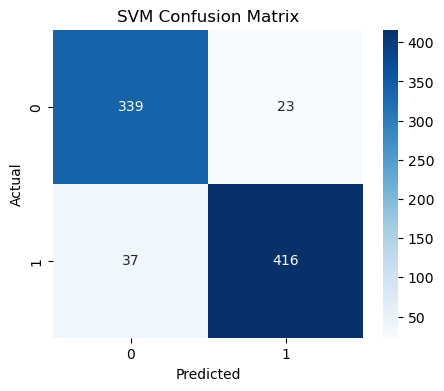

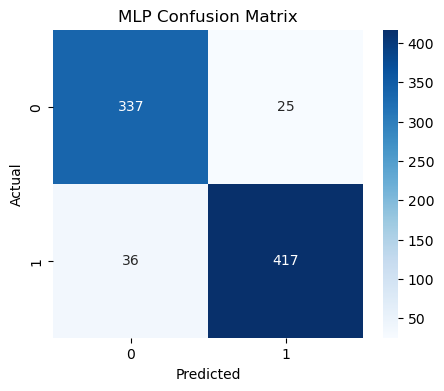

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, svm_preds, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, mlp_preds, "MLP Confusion Matrix")


## Trying out different optimizations:

In [ ]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Loading image
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resizing for consistency
            images.append(img)
            labels.append(label)
    
    return images, labels

# Loading both categories
with_mask_images, with_mask_labels = load_images_from_folder("../dataset/with_mask", 1)
without_mask_images, without_mask_labels = load_images_from_folder("../dataset/without_mask", 0)

# Combining datasets
X_images = with_mask_images + without_mask_images
y_labels = with_mask_labels + without_mask_labels


In [ ]:
def extract_hog_features(image):
    gray = rgb2gray(image)  # Converting to grayscale
    features, _ = hog(gray, pixels_per_cell=(4, 4), cells_per_block=(3, 3), visualize=True)     # adjusting pixels_per_cell and cells_per_block
    return features

In [ ]:
def extract_lbp_features(image, radius=2, n_points=16):     # adjusting radius and n_points
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)
    return hist


In [ ]:
def extract_canny_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)  # Applying Canny edge detection      # adjusting parameters
    return edges.flatten()  # Flattening the edge image into a feature vector


In [ ]:
def extract_color_histogram(image, bins=32):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Converting to HSV
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    return hist.flatten()


In [ ]:
def extract_features(image):
    hog_feat = extract_hog_features(image)
    lbp_feat = extract_lbp_features(image)
    canny_feat = extract_canny_features(image)
    color_hist_feat = extract_color_histogram(image)

    # Concatenating all features into one feature vector
    feature_vector = np.hstack((hog_feat, lbp_feat, canny_feat, color_hist_feat))
    return feature_vector

# Extracting features from all images
X_features = np.array([extract_features(img) for img in X_images])
y = np.array(y_labels)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)

print("SVM Accuracy:", svm_acc)
print(classification_report(y_test, svm_preds))


SVM Accuracy: 0.9447852760736196
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       362
           1       0.96      0.94      0.95       453

    accuracy                           0.94       815
   macro avg       0.94      0.95      0.94       815
weighted avg       0.95      0.94      0.94       815



In [ ]:
import joblib

# Saving the trained model
joblib.dump(svm_model, "svm_mask_classifier_modified.pkl")
print("Model saved successfully!")


Model saved successfully!


In [27]:
joblib.dump(scaler, "scaler_modified.pkl")

['scaler_modified.pkl']

In [28]:
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, activation="relu")
mlp_model.fit(X_train, y_train)

mlp_preds = mlp_model.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_preds)

print("MLP Accuracy:", mlp_acc)
print(classification_report(y_test, mlp_preds))


MLP Accuracy: 0.9312883435582822
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       362
           1       0.95      0.93      0.94       453

    accuracy                           0.93       815
   macro avg       0.93      0.93      0.93       815
weighted avg       0.93      0.93      0.93       815



In [ ]:
# Saving the trained model
joblib.dump(mlp_model, "mlp_mask_classifier_modified.pkl")
print("Model saved successfully!")


Model saved successfully!


In [30]:
print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"MLP Accuracy: {mlp_acc:.4f}")


SVM Accuracy: 0.9448
MLP Accuracy: 0.9313


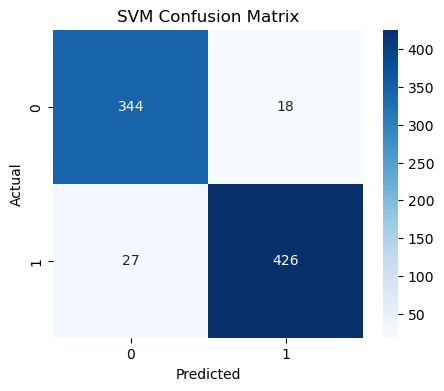

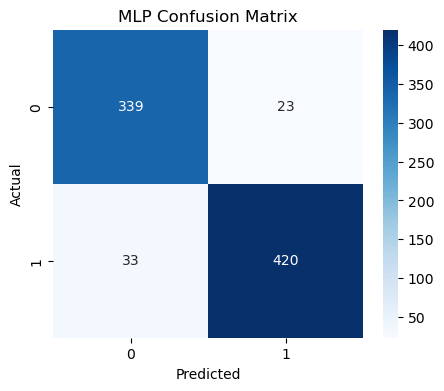

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, svm_preds, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, mlp_preds, "MLP Confusion Matrix")
